In this notebook we will build a classification model using Naive Bayes classifier from python's scikit learn library

## Loading Data

In this section we will import all the necessary packages and load the datasets we plan to work on. We will use the 
<a href='https://www.kaggle.com/jessemostipak/hotel-booking-demand'> Hotel booking data </a> and build a model to determine which customers will cancel their hotel booking

In [79]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats.stats import pearsonr
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder

In [140]:
# Load the data
file_path = 'C:\Users\Tejal\Documents\Tejal\WWC-siliconvalley\hotel_bookings.csv'
df = pd.read_csv(file_path)

## Explore the dataset

Understanding the data, its features and distribution is a major part of builiding ML models. 

In [139]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,meal,market_segment,distribution_channel,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,total_days,total_customers
0,1,0,342,0,7,27,1,0,3,1,...,2,3,0,0,2,0.0,0,0,0,2.0
1,1,0,737,0,7,27,1,0,3,1,...,2,4,0,0,2,0.0,0,0,0,2.0
2,1,0,7,0,7,27,1,0,3,1,...,2,0,0,0,2,75.0,0,0,1,1.0
3,1,0,13,0,7,27,1,0,2,0,...,0,0,0,0,2,75.0,0,0,1,1.0
4,1,0,14,0,7,27,1,0,6,3,...,0,0,0,0,2,98.0,0,1,2,2.0


In [4]:
# Data has 119390 rows (data points) and 32 columns (features)
df.shape

(119390, 32)

In [6]:
# Check the datatype of features
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [7]:
# Feature list 
df.columns

Index([u'hotel', u'is_canceled', u'lead_time', u'arrival_date_year',
       u'arrival_date_month', u'arrival_date_week_number',
       u'arrival_date_day_of_month', u'stays_in_weekend_nights',
       u'stays_in_week_nights', u'adults', u'children', u'babies', u'meal',
       u'country', u'market_segment', u'distribution_channel',
       u'is_repeated_guest', u'previous_cancellations',
       u'previous_bookings_not_canceled', u'reserved_room_type',
       u'assigned_room_type', u'booking_changes', u'deposit_type', u'agent',
       u'company', u'days_in_waiting_list', u'customer_type', u'adr',
       u'required_car_parking_spaces', u'total_of_special_requests',
       u'reservation_status', u'reservation_status_date'],
      dtype='object')

In [10]:
# Check for null values
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', ascending=False,inplace=True)
missing_value_df

,column_name,percent_missing
company,company,94.306893
agent,agent,13.686238
country,country,0.408744
children,children,0.003350
reserved_room_type,reserved_room_type,0.000000
assigned_room_type,assigned_room_type,0.000000
booking_changes,booking_changes,0.000000
deposit_type,deposit_type,0.000000
hotel,hotel,0.000000
previous_cancellations,previous_cancellations,0.000000


Company, agent, country and children have null values. There are multiple techniques for imputing null value but for simplicity we impute them with 0. As company has a very high null value percentage we will drop the column

In [141]:
# Let us create a copy of dataframe for backup and impute null with 0
backup_df=df.copy
df = df.drop('company',axis=1)
df=df.fillna(0)

In [142]:
# The df has no Null values
(df['children'].isnull().sum()/len(df)) * 100

0

## Data Visualization

In this task, our target variable is is_cancelled which indicates if the booking was cancelled 

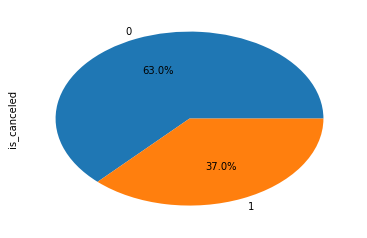

In [15]:
df['is_canceled'].value_counts().plot(kind='pie',autopct='%1.1f%%')

37% customers have cancelled their bookings. we see that our data in imbalanced

In [35]:
df.columns

Index([u'hotel', u'is_canceled', u'lead_time', u'arrival_date_year',
       u'arrival_date_month', u'arrival_date_week_number',
       u'arrival_date_day_of_month', u'stays_in_weekend_nights',
       u'stays_in_week_nights', u'adults', u'children', u'babies', u'meal',
       u'country', u'market_segment', u'distribution_channel',
       u'is_repeated_guest', u'previous_cancellations',
       u'previous_bookings_not_canceled', u'reserved_room_type',
       u'assigned_room_type', u'booking_changes', u'deposit_type', u'agent',
       u'days_in_waiting_list', u'customer_type', u'adr',
       u'required_car_parking_spaces', u'total_of_special_requests',
       u'reservation_status', u'reservation_status_date'],
      dtype='object')

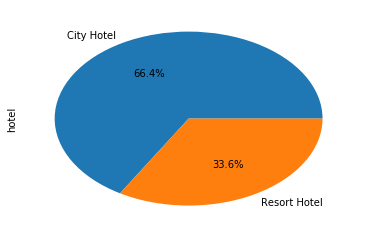

In [37]:
# Hotel feature count and distribution across 0 and 1 class 
df['hotel'].value_counts().plot(kind='pie',autopct='%1.1f%%')

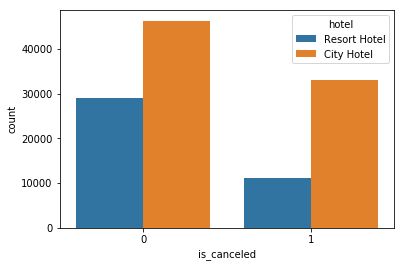

In [36]:
sns.countplot(x='is_canceled',hue='hotel',data=df)

As data has higher city hotel reservation data points compared to resort, above observation is on par with  same trend

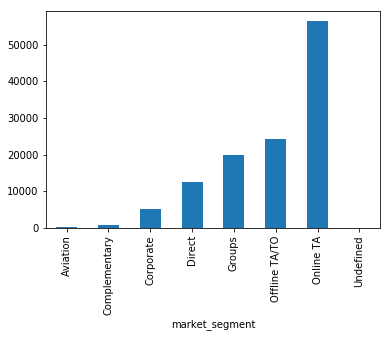

In [38]:
#market segments
df.groupby(['market_segment'])['is_canceled'].count().plot(kind='bar')

In [65]:
#Let us add weekend stay and weekday stay days to get total days of stay
df['total_days'] = df['stays_in_week_nights'] + df['stays_in_weekend_nights']
# drop the weekend stay and weekday stay days features
df = df.drop('stays_in_week_nights',axis=1).drop('stays_in_weekend_nights',axis=1)

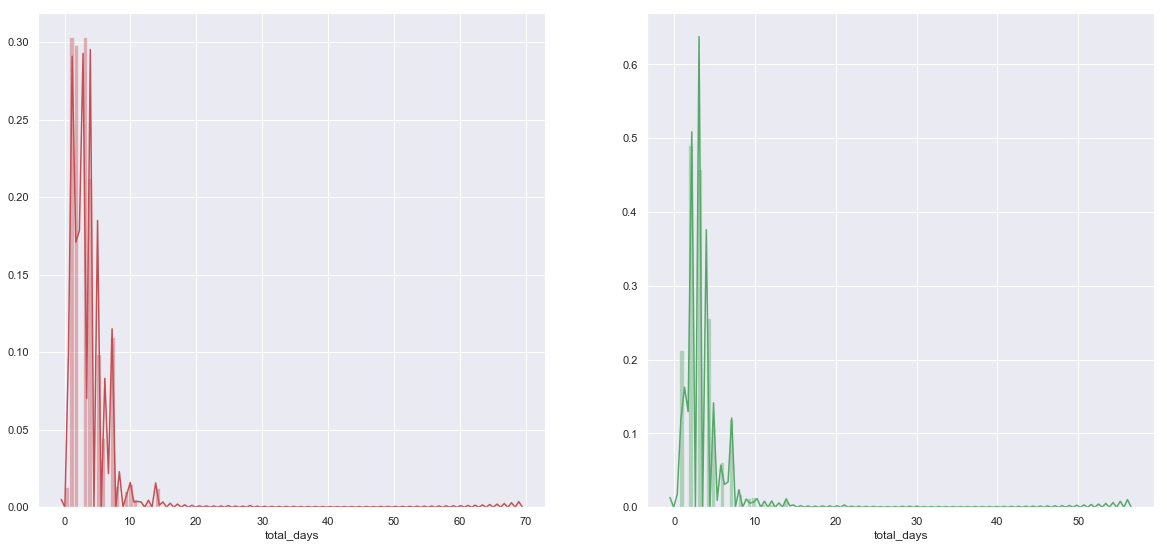

In [62]:
from pylab import *
df_0=df[(df['is_canceled']==0)]
df_1=df[df['is_canceled']==1]
sns.set(rc={"figure.figsize": (20, 20)})
subplot(2,2,1)
ax = sns.distplot(df_0['total_days'], bins=100, color='r')
subplot(2,2,2)
ax=sns.distplot(df_1['total_days'], bins=100, color='g')

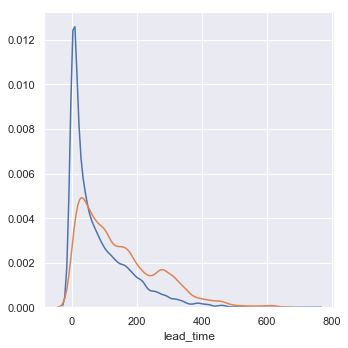

In [63]:
# lead time distribution
g = sns.FacetGrid(df, hue="is_canceled", height=5) #,xlim=(0,500))
g = g.map(sns.kdeplot, "lead_time")

## Feature Engineering

1. Derive new features using existing features
2. Remove irrelevant features
3. Transform existing features
4. Encoding categorical variables

In [144]:
#Total customers
df['total_customers'] = df['adults'] + df['children']+df['babies']
df = df.drop('adults',axis=1).drop('children',axis=1).drop('babies',axis=1)

KeyError: 'adults'

In [145]:
df = df.drop(['reservation_status_date'],axis=1)

In [146]:
len(df['agent'].unique()) # 334 unique values - Large number of unique agents and it is categorical, difficult to encode
df = df.drop('agent',axis=1)

In [147]:
len(df['country'].unique()) # 178 countries
df = df.drop('country',axis=1)

In [148]:
# df['previous_bookings_not_canceled'].value_counts() # We observe that most data has value = 0; hence we drop the feature
# df.groupby(['is_canceled'])['previous_bookings_not_canceled'].value_counts() # We observe that data distribution across both class is remains same
df = df.drop('previous_bookings_not_canceled',axis=1)

In [149]:
# df['previous_cancellations'].value_counts().plot('bar') 
# df.groupby(['is_canceled'])['previous_cancellations'].value_counts()
df = df.drop('previous_cancellations',axis=1)

In [150]:
len(df.columns)

24

In [151]:
backup = df.copy()

In [152]:
#Custom encoding
df['arrival_date_month'] = df['arrival_date_month'].map({'January':1, 'February': 2, 'March':3, \
                                                         'April':4, 'May':5, 'June':6, 'July':7,\
                                                         'August':8, 'September':9, 'October':10, \
                                                         'November':11, 'December':12})

In [153]:
encode = LabelEncoder()

In [154]:
df.columns

Index([u'hotel', u'is_canceled', u'lead_time', u'arrival_date_year',
       u'arrival_date_month', u'arrival_date_week_number',
       u'arrival_date_day_of_month', u'stays_in_weekend_nights',
       u'stays_in_week_nights', u'meal', u'market_segment',
       u'distribution_channel', u'is_repeated_guest', u'reserved_room_type',
       u'assigned_room_type', u'booking_changes', u'deposit_type',
       u'days_in_waiting_list', u'customer_type', u'adr',
       u'required_car_parking_spaces', u'total_of_special_requests',
       u'reservation_status', u'total_customers'],
      dtype='object')

In [155]:
cat_col=['hotel','arrival_date_year','meal','market_segment','distribution_channel','reserved_room_type', 'assigned_room_type',\
        'deposit_type','customer_type','reservation_status']
for i in cat_col:
    df[i] = encode.fit_transform(df[i])

In [102]:
df[cat_col].head()

,arrival_date_year,meal,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
0,0,0,3,1,2,2,0,2,1
1,0,0,3,1,2,2,0,2,1
2,0,0,3,1,0,2,0,2,1
3,0,0,2,0,0,0,0,2,1
4,0,0,6,3,0,0,0,2,1


### Feature correlation

In [104]:
df.corr()

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,meal,market_segment,distribution_channel,is_repeated_guest,...,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,total_days,total_customers
is_canceled,1.000000,0.293123,0.016660,0.011022,0.008148,-0.006130,-0.017678,0.059338,0.167600,-0.084793,...,-0.144381,0.468634,0.054186,-0.068140,0.047557,-0.195498,-0.234658,-0.917196,0.017779,0.046506
lead_time,0.293123,1.000000,0.040142,0.131424,0.126871,0.002268,0.000349,0.013797,0.220414,-0.124410,...,0.000149,0.375667,0.170084,0.073403,-0.063077,-0.116451,-0.095712,-0.302175,0.157167,0.072279
arrival_date_year,0.016660,0.040142,1.000000,-0.527739,-0.540561,-0.000221,0.065840,0.107697,0.022644,0.010341,...,0.030872,-0.064714,-0.056497,-0.006149,0.197580,-0.013684,0.108531,-0.017683,0.031438,0.052152
arrival_date_month,0.011022,0.131424,-0.527739,1.000000,0.995105,-0.026063,-0.015205,0.001293,0.007381,-0.030729,...,0.004809,0.004048,0.019045,-0.029753,0.079315,0.000257,0.028026,-0.021090,0.021536,0.027246
arrival_date_week_number,0.008148,0.126871,-0.540561,0.995105,1.000000,0.066809,-0.017381,-0.000510,0.005699,-0.030131,...,0.005508,0.003891,0.022933,-0.028432,0.075791,0.001920,0.026149,-0.017387,0.018719,0.025216
arrival_date_day_of_month,-0.006130,0.002268,-0.000221,-0.026063,0.066809,1.000000,-0.007086,-0.004088,0.001578,-0.006145,...,0.010613,-0.001358,0.022728,0.012188,0.030245,0.008683,0.003062,0.011460,-0.027408,0.006758
meal,-0.017678,0.000349,0.065840,-0.015205,-0.017381,-0.007086,1.000000,0.145132,0.116957,-0.057009,...,0.024650,-0.092151,-0.007132,0.044658,0.059098,-0.038923,0.023136,0.015393,0.045277,-0.005968
market_segment,0.059338,0.013797,0.107697,0.001293,-0.000510,-0.004088,0.145132,1.000000,0.767751,-0.250286,...,-0.071818,-0.184847,-0.041503,-0.165814,0.232763,-0.062226,0.274373,-0.061584,0.126052,0.213210
distribution_channel,0.167600,0.220414,0.022644,0.007381,0.005699,0.001578,0.116957,0.767751,1.000000,-0.263219,...,-0.113601,0.092580,0.048642,-0.069640,0.092396,-0.132280,0.098815,-0.171330,0.101407,0.144344
is_repeated_guest,-0.084793,-0.124410,0.010341,-0.030729,-0.030131,-0.006145,-0.057009,-0.250286,-0.263219,1.000000,...,0.012092,-0.057502,-0.022235,-0.017111,-0.134314,0.077090,0.013050,0.083504,-0.106626,-0.136747


In [173]:
feat_corr['deposit_type'].sort_values()

reservation_status            -0.466185
total_of_special_requests     -0.266672
assigned_room_type            -0.242384
reserved_room_type            -0.199689
market_segment                -0.184847
booking_changes               -0.112153
total_days                    -0.100809
meal                          -0.092151
required_car_parking_spaces   -0.090929
adr                           -0.089838
total_customers               -0.079277
customer_type                 -0.076404
arrival_date_year             -0.064714
is_repeated_guest             -0.057502
arrival_date_day_of_month     -0.001358
arrival_date_week_number       0.003891
arrival_date_month             0.004048
distribution_channel           0.092580
days_in_waiting_list           0.121017
lead_time                      0.375667
is_canceled                    0.468634
deposit_type                   1.000000
Name: deposit_type, dtype: float64

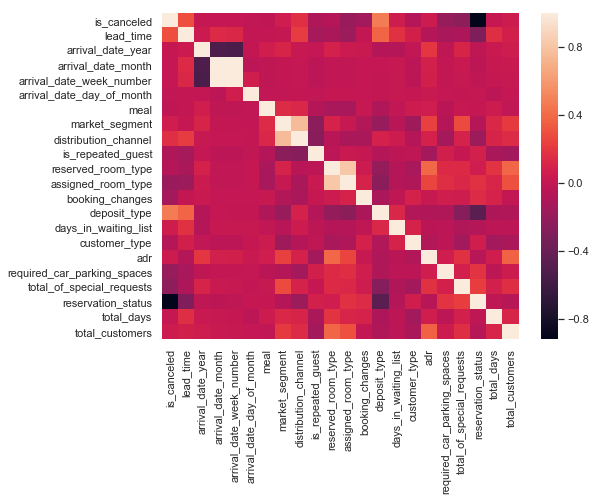

In [105]:
plt.figure(figsize=(8,6))
feat_corr = df.corr()
sns.heatmap(feat_corr)

The diagonal shows correlation of each feature with itself, hence indicates highest correlation.
Using the table and plot we observe that few features have veryhigh correlation
Ex:- 
1. Arrival_date_year and arrival_date_month = -0.52
2. Reservation_status and deposit type = -0.46 
3. market_segment vs distribution_channel = 0.76
4. reserved_room_type vs assigned_room_type = 0.81

It is advisable to remove one of the features from the high correlation pair, but we will reatin them and see the effect on performance

In [107]:
feat_corr['is_canceled'].sort_values()

reservation_status            -0.917196
total_of_special_requests     -0.234658
required_car_parking_spaces   -0.195498
assigned_room_type            -0.176028
booking_changes               -0.144381
is_repeated_guest             -0.084793
customer_type                 -0.068140
reserved_room_type            -0.061282
meal                          -0.017678
arrival_date_day_of_month     -0.006130
arrival_date_week_number       0.008148
arrival_date_month             0.011022
arrival_date_year              0.016660
total_days                     0.017779
total_customers                0.046506
adr                            0.047557
days_in_waiting_list           0.054186
market_segment                 0.059338
distribution_channel           0.167600
lead_time                      0.293123
deposit_type                   0.468634
is_canceled                    1.000000
Name: is_canceled, dtype: float64

The reservation_status has high correlation with is_canceled. For iteration 1, lets retain the feature.

## Implementing gaussian NB classifier

In [156]:
df=df.fillna(0)

In [157]:
# Split data into train test set in train:test=70:30 size
y = df["is_canceled"]
X = df.drop(["is_canceled"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

In [158]:
classifier2 = GaussianNB()
classifier2.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [159]:
y_pred2 = classifier2.predict(X_test)
y_prob2 = classifier2.predict_proba(X_test)

## Evaluation metric

In [160]:
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score
from sklearn.metrics import confusion_matrix,auc,roc_auc_score
print('test-set confusion matrix:\n', confusion_matrix(y_test,y_pred2)) 
print("recall score: ", recall_score(y_test,y_pred2))
print("precision score: ", precision_score(y_test,y_pred2))
print("f1 score: ", f1_score(y_test,y_pred2))
print("accuracy score: ", accuracy_score(y_test,y_pred2))

('test-set confusion matrix:\n', array([[22215,   263],
       [    0, 13339]], dtype=int64))
('recall score: ', 1.0)
('precision score: ', 0.9806646081458609)
('f1 score: ', 0.9902379273226681)
('accuracy score: ', 0.9926571181282631)


Model 2 - Remove the feature that is highly correlated with target feature
<br>
<b>Reservation_status</b> has high correlation with is_canceled. For iteration 1, lets retain the feature. Looking at the values in column reveals that canceled is a reservation type. This might be causing data leak. Hence we will delete this feature

In [109]:
backup['reservation_status'].unique()

array(['Check-Out', 'Canceled', 'No-Show'], dtype=object)

In [174]:
df = df.drop('reservation_status',axis=1)

In [ ]:
# Split data into train test set in train:test=70:30 size
y = df["is_canceled"]
X = df.drop(["is_canceled"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

In [125]:
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [137]:
y_pred = classifier.predict(X_test)
y_prob = classifier.predict_proba(X_test)

In [134]:
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score
from sklearn.metrics import confusion_matrix,auc,roc_auc_score
print('test-set confusion matrix:\n', confusion_matrix(y_test,y_pred)) 
print("recall score: ", recall_score(y_test,y_pred))
print("precision score: ", precision_score(y_test,y_pred))
print("f1 score: ", f1_score(y_test,y_pred))
print("accuracy score: ", accuracy_score(y_test,y_pred))

('test-set confusion matrix:\n', array([[ 7555, 14923],
       [ 1203, 12136]], dtype=int64))
('recall score: ', 0.9098133293350326)
('precision score: ', 0.4485014228168077)
('f1 score: ', 0.6008218228625178)
('accuracy score: ', 0.5497668704804981)


Model 3 - Let us remove 1 feature from the correlated feature pair
1. Arrival_date_year and arrival_date_month = -0.52
2. Reservation_status and deposit type = -0.46 
3. market_segment vs distribution_channel = 0.76
4. reserved_room_type vs assigned_room_type = 0.81

In [178]:
df1=df.copy()
df = df.drop('arrival_date_month',axis=1)
df = df.drop('market_segment',axis=1)
df = df.drop('reserved_room_type',axis=1)

In [179]:
# Split data into train test set in train:test=70:30 size
y = df["is_canceled"]
X = df.drop(["is_canceled"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

In [180]:
classifier3 = GaussianNB()
classifier3.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [182]:
y_pred3 = classifier3.predict(X_test)
y_prob3 = classifier3.predict_proba(X_test)

In [183]:
print('test-set confusion matrix:\n', confusion_matrix(y_test,y_pred3)) 
print("recall score: ", recall_score(y_test,y_pred3))
print("precision score: ", precision_score(y_test,y_pred3))
print("f1 score: ", f1_score(y_test,y_pred3))
print("accuracy score: ", accuracy_score(y_test,y_pred3))

('test-set confusion matrix:\n', array([[ 7164, 15314],
       [ 1112, 12227]], dtype=int64))
('recall score: ', 0.9166354299422745)
('precision score: ', 0.44395628335935516)
('f1 score: ', 0.5981898238747555)
('accuracy score: ', 0.5413909596001899)
